# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [150]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import pearsonr
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [151]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [152]:
# Empty lists that will be populated during the API calling loop
wx_cities = []
lats = []
lngs = []
temps = []
humids = []
clouds = []
winds = []
wx_city_count = 0

for city in cities:
    
    wx_url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'
    response = requests.get(wx_url).json()
    
    if response['cod'] == 200:

        wx_city_count += 1
        wx_cities.append(response['name'])           # Get the name of the city from the WX API
        lats.append(response['coord']['lat'])        # Also get lat / long from WX API since city names can be duplicated
        lngs.append(response['coord']['lon'])        # the data received may from a different city than in the initial list
        temps.append(response['main']['temp_max'])   # Get max temp for the day
        humids.append(response['main']['humidity'])  # Get current humidity, cloud cover and wind speed
        clouds.append(response['clouds']['all'])
        winds.append(response['wind']['speed'])
        
        # Print output as WX data is recieved.
        print(f"{wx_city_count} - City: {response['name']}  ID: {response['id']} Lat: {lats[-1]}, Lng {lngs[-1]}, Temp: {temps[-1]}, Humidity: {humids[-1]}, Cloud Cover: {clouds[-1]}%, Wind Speed: {winds[-1]}")
    
    else:
        # Print notification if a city was not found.
        print(f"*** City {city} not found! ***")

# Get current time after the data has been received.  Used in the chart titles later on.
t_api = time.localtime()


1 - City: Ushuaia  ID: 3833367 Lat: -54.8, Lng -68.3, Temp: 46.06, Humidity: 76, Cloud Cover: 75%, Wind Speed: 9.22
2 - City: Mumford  ID: 2297810 Lat: 5.2618, Lng -0.759, Temp: 78.67, Humidity: 88, Cloud Cover: 45%, Wind Speed: 10.92
3 - City: Barrow  ID: 5880054 Lat: 71.2906, Lng -156.7887, Temp: 21.22, Humidity: 79, Cloud Cover: 90%, Wind Speed: 0
4 - City: Bandarbeyla  ID: 64814 Lat: 9.4942, Lng 50.8122, Temp: 76.59, Humidity: 89, Cloud Cover: 65%, Wind Speed: 12.97
5 - City: Saint Paul Harbor  ID: 5866583 Lat: 57.79, Lng -152.4072, Temp: 43.29, Humidity: 87, Cloud Cover: 90%, Wind Speed: 34.52
6 - City: Kiryat Gat  ID: 293842 Lat: 31.61, Lng 34.7642, Temp: 71.4, Humidity: 100, Cloud Cover: 58%, Wind Speed: 0.89
7 - City: Ukiah  ID: 5404476 Lat: 39.1502, Lng -123.2078, Temp: 66.43, Humidity: 60, Cloud Cover: 1%, Wind Speed: 12.66
8 - City: Richards Bay  ID: 962367 Lat: -28.783, Lng 32.0377, Temp: 59.81, Humidity: 88, Cloud Cover: 100%, Wind Speed: 11.36
9 - City: Bengkulu  ID: 1649

66 - City: Namatanai  ID: 2090021 Lat: -3.6667, Lng 152.4333, Temp: 83.91, Humidity: 68, Cloud Cover: 56%, Wind Speed: 7.9
67 - City: Naze  ID: 1855540 Lat: 28.3667, Lng 129.4833, Temp: 72.52, Humidity: 74, Cloud Cover: 100%, Wind Speed: 13.65
68 - City: Talnakh  ID: 1490256 Lat: 69.4865, Lng 88.3972, Temp: 33.96, Humidity: 100, Cloud Cover: 100%, Wind Speed: 6.89
69 - City: Khatanga  ID: 2022572 Lat: 71.9667, Lng 102.5, Temp: 32.85, Humidity: 99, Cloud Cover: 100%, Wind Speed: 11.52
70 - City: Nicoya  ID: 3622716 Lat: 10.1483, Lng -85.452, Temp: 72.95, Humidity: 85, Cloud Cover: 92%, Wind Speed: 0.63
71 - City: Hermanus  ID: 3366880 Lat: -34.4187, Lng 19.2345, Temp: 54.9, Humidity: 65, Cloud Cover: 64%, Wind Speed: 5.68
72 - City: Belaya Gora  ID: 2126785 Lat: 68.5333, Lng 146.4167, Temp: -1.91, Humidity: 98, Cloud Cover: 73%, Wind Speed: 2.95
73 - City: Dikson  ID: 1507390 Lat: 73.5069, Lng 80.5464, Temp: 31.15, Humidity: 99, Cloud Cover: 100%, Wind Speed: 3.47
74 - City: Myanaung  I

131 - City: Ponta do Sol  ID: 2264557 Lat: 32.6667, Lng -17.1, Temp: 72.23, Humidity: 73, Cloud Cover: 94%, Wind Speed: 2.57
*** City rungata not found! ***
132 - City: Hansot  ID: 1270413 Lat: 21.5833, Lng 72.8, Temp: 80.11, Humidity: 72, Cloud Cover: 52%, Wind Speed: 5.21
133 - City: Zhenlai  ID: 2033128 Lat: 45.8495, Lng 123.2973, Temp: 32.59, Humidity: 70, Cloud Cover: 74%, Wind Speed: 8.57
134 - City: Gizo Government Station  ID: 2108857 Lat: -8.103, Lng 156.8419, Temp: 84.02, Humidity: 69, Cloud Cover: 99%, Wind Speed: 5.66
135 - City: Sheopur  ID: 1256593 Lat: 25.6667, Lng 76.7, Temp: 69.8, Humidity: 96, Cloud Cover: 100%, Wind Speed: 18.61
136 - City: Rundu  ID: 3353383 Lat: -17.9333, Lng 19.7667, Temp: 71.22, Humidity: 19, Cloud Cover: 65%, Wind Speed: 6.42
137 - City: Vostok  ID: 2013279 Lat: 46.4856, Lng 135.8833, Temp: 17.04, Humidity: 70, Cloud Cover: 10%, Wind Speed: 5.1
138 - City: Vitim  ID: 2013375 Lat: 59.4511, Lng 112.5578, Temp: 23.63, Humidity: 84, Cloud Cover: 96%

196 - City: Praia da Vitória  ID: 3372760 Lat: 38.7333, Lng -27.0667, Temp: 70.75, Humidity: 88, Cloud Cover: 20%, Wind Speed: 12.93
*** City alotau not found! ***
197 - City: Jumla  ID: 1283285 Lat: 29.2747, Lng 82.1838, Temp: 55.09, Humidity: 86, Cloud Cover: 89%, Wind Speed: 5.1
198 - City: Constitución  ID: 3893726 Lat: -35.3333, Lng -72.4167, Temp: 58.57, Humidity: 69, Cloud Cover: 1%, Wind Speed: 15.95
199 - City: Sembakung  ID: 1627877 Lat: 3.8167, Lng 117.25, Temp: 76.93, Humidity: 99, Cloud Cover: 54%, Wind Speed: 1.9
200 - City: Gouyave  ID: 3580279 Lat: 12.1646, Lng -61.7296, Temp: 84.97, Humidity: 74, Cloud Cover: 20%, Wind Speed: 13.8
201 - City: Hirara  ID: 1862505 Lat: 24.8, Lng 125.2833, Temp: 75.47, Humidity: 69, Cloud Cover: 75%, Wind Speed: 9.22
*** City mys shmidta not found! ***
202 - City: Tsimmerbude  ID: 485660 Lat: 54.675, Lng 20.1347, Temp: 48.25, Humidity: 79, Cloud Cover: 99%, Wind Speed: 11.01
203 - City: Smirnykh  ID: 2121126 Lat: 49.75, Lng 142.8333, Temp

*** City satitoa not found! ***
*** City tabialan not found! ***
260 - City: Cascais  ID: 2269594 Lat: 38.6979, Lng -9.4215, Temp: 68.5, Humidity: 81, Cloud Cover: 95%, Wind Speed: 1.01
261 - City: Mount Isa  ID: 2065594 Lat: -20.7333, Lng 139.5, Temp: 74.97, Humidity: 31, Cloud Cover: 7%, Wind Speed: 0
262 - City: Belfast  ID: 2655984 Lat: 54.5833, Lng -5.9333, Temp: 57.02, Humidity: 91, Cloud Cover: 90%, Wind Speed: 3.44
263 - City: Beian  ID: 3160100 Lat: 63.6559, Lng 9.5683, Temp: 45.01, Humidity: 70, Cloud Cover: 40%, Wind Speed: 17.27
264 - City: Sarh  ID: 2425791 Lat: 9.1429, Lng 18.3923, Temp: 78.71, Humidity: 83, Cloud Cover: 0%, Wind Speed: 4.61
*** City tsienyane not found! ***
265 - City: Kunashak  ID: 1501402 Lat: 55.7032, Lng 61.5498, Temp: 43.32, Humidity: 58, Cloud Cover: 49%, Wind Speed: 5.95
266 - City: Springbok  ID: 3361142 Lat: -29.6643, Lng 17.8865, Temp: 48.45, Humidity: 57, Cloud Cover: 0%, Wind Speed: 7.74
267 - City: Bambous Virieux  ID: 1106677 Lat: -20.3428,

324 - City: Nouakchott  ID: 2377450 Lat: 18.0858, Lng -15.9785, Temp: 88.12, Humidity: 36, Cloud Cover: 2%, Wind Speed: 10.16
325 - City: Katsuura  ID: 2112309 Lat: 35.1333, Lng 140.3, Temp: 56.19, Humidity: 66, Cloud Cover: 67%, Wind Speed: 19.48
326 - City: Dingle  ID: 1714733 Lat: 10.9995, Lng 122.6711, Temp: 76.15, Humidity: 93, Cloud Cover: 16%, Wind Speed: 5.73
327 - City: Vallenar  ID: 3868633 Lat: -28.5708, Lng -70.7581, Temp: 74.37, Humidity: 32, Cloud Cover: 0%, Wind Speed: 5.77
328 - City: Roebourne  ID: 2062276 Lat: -20.7833, Lng 117.1333, Temp: 67.98, Humidity: 58, Cloud Cover: 7%, Wind Speed: 7.29
329 - City: Usinsk  ID: 863061 Lat: 65.9939, Lng 57.5281, Temp: 34.72, Humidity: 96, Cloud Cover: 57%, Wind Speed: 13.6
330 - City: Yulara  ID: 6355222 Lat: -25.2406, Lng 130.9889, Temp: 66.04, Humidity: 30, Cloud Cover: 6%, Wind Speed: 5.75
331 - City: São Filipe  ID: 3374210 Lat: 14.8961, Lng -24.4956, Temp: 78.82, Humidity: 77, Cloud Cover: 0%, Wind Speed: 4.45
332 - City: Ki

*** City temaraia not found! ***
391 - City: Meybod  ID: 124193 Lat: 32.2501, Lng 54.0166, Temp: 71.62, Humidity: 22, Cloud Cover: 14%, Wind Speed: 0.98
392 - City: Imbituba  ID: 3461370 Lat: -28.24, Lng -48.6703, Temp: 62.49, Humidity: 89, Cloud Cover: 100%, Wind Speed: 5.12
393 - City: Kodīnar  ID: 1266397 Lat: 20.7903, Lng 70.7031, Temp: 77.43, Humidity: 70, Cloud Cover: 90%, Wind Speed: 12.86
394 - City: Severobaykal'sk  ID: 2016910 Lat: 55.65, Lng 109.3167, Temp: 24.19, Humidity: 63, Cloud Cover: 10%, Wind Speed: 4.25
395 - City: Ribas do Rio Pardo  ID: 3451399 Lat: -20.4431, Lng -53.7592, Temp: 78.67, Humidity: 70, Cloud Cover: 87%, Wind Speed: 4.92
396 - City: Pārsābād  ID: 121380 Lat: 39.6482, Lng 47.9174, Temp: 64.72, Humidity: 88, Cloud Cover: 75%, Wind Speed: 0
397 - City: Morant Bay  ID: 3489440 Lat: 17.8815, Lng -76.4093, Temp: 85.62, Humidity: 77, Cloud Cover: 98%, Wind Speed: 4.36
398 - City: Morristown  ID: 4642938 Lat: 36.214, Lng -83.2949, Temp: 64.54, Humidity: 44, C

456 - City: Severo-Kuril'sk  ID: 2121385 Lat: 50.6789, Lng 156.125, Temp: 39.63, Humidity: 78, Cloud Cover: 36%, Wind Speed: 41.2
457 - City: Pacific Grove  ID: 5380437 Lat: 36.6177, Lng -121.9166, Temp: 74.57, Humidity: 80, Cloud Cover: 1%, Wind Speed: 3
458 - City: Waddān  ID: 2209055 Lat: 29.1614, Lng 16.139, Temp: 72.32, Humidity: 38, Cloud Cover: 0%, Wind Speed: 17.27
459 - City: Madimba  ID: 878141 Lat: -10.4, Lng 40.3333, Temp: 74.8, Humidity: 84, Cloud Cover: 7%, Wind Speed: 10.38
460 - City: Leh  ID: 1264976 Lat: 34.1667, Lng 77.5833, Temp: 41.68, Humidity: 78, Cloud Cover: 100%, Wind Speed: 2.73
461 - City: San Vicente  ID: 3428068 Lat: -26.6167, Lng -54.1333, Temp: 61, Humidity: 96, Cloud Cover: 60%, Wind Speed: 3.69
462 - City: Mossamedes  ID: 3347019 Lat: -15.1961, Lng 12.1522, Temp: 64.87, Humidity: 88, Cloud Cover: 27%, Wind Speed: 4.92
463 - City: Mīnāb  ID: 123941 Lat: 27.1467, Lng 57.0801, Temp: 76.5, Humidity: 25, Cloud Cover: 0%, Wind Speed: 1.77
464 - City: Venice 

522 - City: Wagar  ID: 364027 Lat: 16.1525, Lng 36.2032, Temp: 84.79, Humidity: 32, Cloud Cover: 1%, Wind Speed: 9.62
523 - City: Hualmay  ID: 3939761 Lat: -11.0964, Lng -77.6139, Temp: 64.35, Humidity: 83, Cloud Cover: 100%, Wind Speed: 10.07
524 - City: Corning  ID: 5113760 Lat: 42.1428, Lng -77.0547, Temp: 55.45, Humidity: 72, Cloud Cover: 90%, Wind Speed: 11.5
525 - City: Plyussa  ID: 508743 Lat: 58.4308, Lng 29.3654, Temp: 37.94, Humidity: 81, Cloud Cover: 1%, Wind Speed: 9.06
526 - City: Tazmalt  ID: 2477537 Lat: 36.3868, Lng 4.3989, Temp: 64.89, Humidity: 66, Cloud Cover: 100%, Wind Speed: 2.48
527 - City: Camaçari  ID: 3468031 Lat: -12.6975, Lng -38.3242, Temp: 78.57, Humidity: 80, Cloud Cover: 93%, Wind Speed: 5.26
528 - City: Bangolo  ID: 2292179 Lat: 7.0069, Lng -7.475, Temp: 73.31, Humidity: 78, Cloud Cover: 28%, Wind Speed: 2.73
*** City mutsamudu not found! ***
529 - City: Poum  ID: 2138555 Lat: -20.2333, Lng 164.0167, Temp: 76.24, Humidity: 82, Cloud Cover: 99%, Wind Spe

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [154]:
# Create DataFram
weather_df = pd.DataFrame({
    'City': wx_cities,
    'Lat': lats,
    'Long': lngs,
    'Temp': temps,
    'Humidity': humids,
    'Clouds': clouds,
    'Winds': winds
})

# Output DataFrame to csv file
weather_df.to_csv(output_data_file, index=False, header=True)

In [155]:
# Display DataFrame for reference
weather_df.head()

,City,Lat,Long,Temp,Humidity,Clouds,Winds
0,Ushuaia,-54.8000,-68.3000,46.06,76,75,9.22
1,Mumford,5.2618,-0.7590,78.67,88,45,10.92
2,Barrow,71.2906,-156.7887,21.22,79,90,0.00
3,Bandarbeyla,9.4942,50.8122,76.59,89,65,12.97
4,Saint Paul Harbor,57.7900,-152.4072,43.29,87,90,34.52


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
# None of the cities have a humidity greater than 100%, the the code is included for future runs

In [156]:
#  Get the indices of cities that have humidity over 100%.
drops = weather_df.index[weather_df['Humidity'] > 100]


In [157]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weather_df.drop(drops, inplace=False)

In [158]:
clean_city_data.head()


,City,Lat,Long,Temp,Humidity,Clouds,Winds
0,Ushuaia,-54.8000,-68.3000,46.06,76,75,9.22
1,Mumford,5.2618,-0.7590,78.67,88,45,10.92
2,Barrow,71.2906,-156.7887,21.22,79,90,0.00
3,Bandarbeyla,9.4942,50.8122,76.59,89,65,12.97
4,Saint Paul Harbor,57.7900,-152.4072,43.29,87,90,34.52


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [159]:
# Create date string to add to plot titles
analysis_date = f"{t_api.tm_mon}/{t_api.tm_mday}/{t_api.tm_year}"


## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(close=None, block=None)>

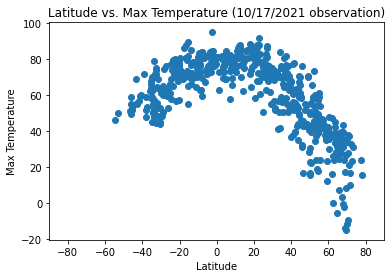

In [161]:
# Build scatter plot for desired criteria
plt.scatter(clean_city_data['Lat'], clean_city_data['Temp'])
plt.title(f"Latitude vs. Max Temperature ({analysis_date} observation)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.xlim(-90,90)

plt.show

Scatter plot depicting maximum temperture vs. latitude.  Upon visual inspection, there appears to be an increase in temparature as the latitude approaches the equator.

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(close=None, block=None)>

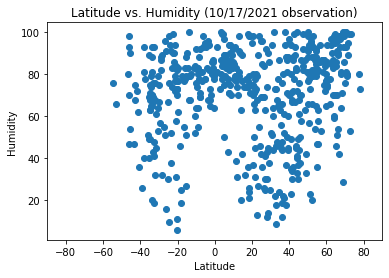

In [162]:
# Build scatter plot for desired criteria
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'])
plt.title(f"Latitude vs. Humidity ({analysis_date} observation)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.xlim(-90,90)

plt.show

Scatter plot of humidity vs. latitude.  Although humidities vary widely across all latitudes, there seems to be a definite lack of lower humidites and the latitudes approach the equator.

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(close=None, block=None)>

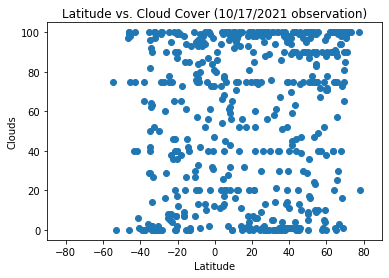

In [163]:
# Build scatter plot for desired criteria
plt.scatter(clean_city_data['Lat'], clean_city_data['Clouds'])
plt.title(f"Latitude vs. Cloud Cover ({analysis_date} observation)")
plt.xlabel('Latitude')
plt.ylabel('Clouds')
plt.xlim(-90,90)

plt.show

Scatter plot of cloud cover vs. latitude.  It looks like latitude have little to no impact on the amount of cloud cover.  However, cloudiness is quite variable.  It would take more data than a single day's worth to make an informed opinion.

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(close=None, block=None)>

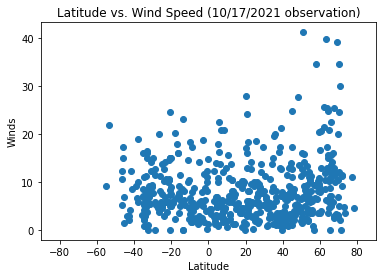

In [164]:
# Build scatter plot for desired criteria
plt.scatter(clean_city_data['Lat'], clean_city_data['Winds'])
plt.title(f"Latitude vs. Wind Speed ({analysis_date} observation)")
plt.xlabel('Latitude')
plt.ylabel('Winds')
plt.xlim(-90,90)

plt.show

Scatter plot of wind speed vs. latitude.  Like cloud cover above, wind speed is highly variable and would require many more observations for a satisfactory analysis.

## Linear Regression

In [166]:
# List to characterize the strength of the correlations
association = ['Weak', 'Moderate', 'Strong']

# Create DataFrames for Northenr and Souther hemispheres
north_hem = clean_city_data.index[weather_df['Lat'] >= 0]
south_hem = clean_city_data.index[weather_df['Lat'] < 0]

north_data = clean_city_data.drop(south_hem, inplace=False)
south_data = clean_city_data.drop(north_hem, inplace=False)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R = -0.84   Slope = -0.91
Strong Negative Correlation



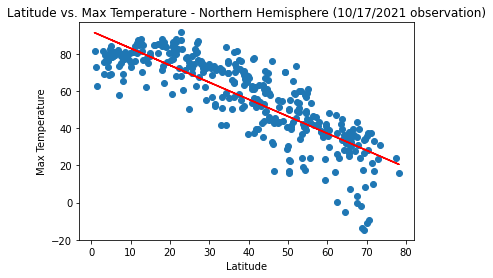

In [167]:
# Calculate the correlation coefficient and linear regression model 
# for maximum temperature and latutude for the Northern hemisphere

#establish x and y values and find St. Pearson Correlation Coefficient for latitude and temperature
correlation = round(pearsonr(north_data['Lat'], north_data['Temp'])[0], 2)

# establish linear regression values
model = linregress(north_data['Lat'], north_data['Temp'])

# Print the strength and direction of correlation
print(f"R = {model[2]:.2f}   Slope = {model[0]:.2f}")
print(f"{association[int(abs(model[2]*3))]} ", end='')
print("Positive " if model[0] > 0 else "Negative ", end='')
print("Correlation")
print()

# linear regression line 
y_values = north_data['Lat'] * model[0] + model[1] # y = mx + b

#print(model)

# scatter plot of the data
plt.scatter(north_data['Lat'], north_data['Temp'])
plt.title(f"Latitude vs. Max Temperature - Northern Hemisphere ({analysis_date} observation)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.plot(north_data['Lat'], y_values, color='red')

plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R = 0.73   Slope = 0.62
Strong Positive Correlation



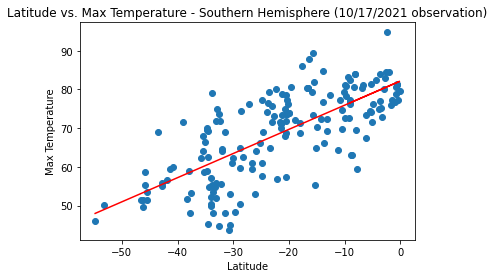

In [168]:
# Calculate the correlation coefficient and linear regression model 
# for maximum temperature and latutude for the Southern hemisphere

#establish x and y values and find St. Pearson Correlation Coefficient for latitude and temperature
correlation = round(pearsonr(south_data['Lat'], south_data['Temp'])[0], 2)

# establish linear regression values
model = linregress(south_data['Lat'], south_data['Temp'])

print(f"R = {model[2]:.2f}   Slope = {model[0]:.2f}")
print(f"{association[int(abs(model[2]*3))]} ", end='')
print("Positive " if model[0] > 0 else "Negative ", end='')
print("Correlation")
print()

# linear regression line 
y_values = south_data['Lat'] * model[0] + model[1] # y = mx + b

#print(model)

# scatter plot of the data
plt.scatter(south_data['Lat'], south_data['Temp'])
plt.title(f"Latitude vs. Max Temperature - Southern Hemisphere ({analysis_date} observation)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.plot(south_data['Lat'], y_values, color='red')

plt.show()


The preceding two plots show the linear relationship between maximum temperature and latitude for cities in the Northern and Southern hemispheres.  Both plots indicate a strong correlation of maximum temperature to latitude.  However, the correlation for the Southern hemisphere is somewhat less strong, with a Correlation Coefficient of 0.73, as compared to the Northern hemisphere's Correlation Coeffiecient of -0.84.  In addition, the Northern hemisphere's strong Correlation Coefficient notwithstanding, visual inspection indicates that the relationship may not me entirely linear, as max temperatures start to fall well below the linear regression line a the locations approach higher latitudes.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R = 0.12   Slope = 0.13
Weak Positive Correlation



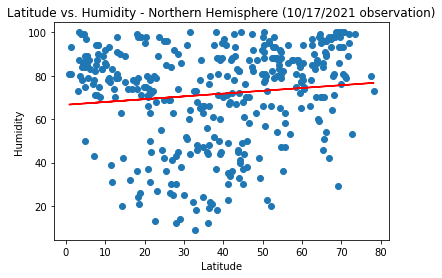

In [169]:
# Calculate the correlation coefficient and linear regression model 
# for humidity and latitude for the Northern hemisphere

#establish x and y values and find St. Pearson Correlation Coefficient for latitude and temperature
correlation = round(pearsonr(north_data['Lat'], north_data['Humidity'])[0], 2)

# establish linear regression values
model = linregress(north_data['Lat'], north_data['Humidity'])

print(f"R = {model[2]:.2f}   Slope = {model[0]:.2f}")
print(f"{association[int(abs(model[2]*3))]} ", end='')
print("Positive " if model[0] > 0 else "Negative ", end='')
print("Correlation")
print()

# linear regression line 
y_values = north_data['Lat'] * model[0] + model[1] # y = mx + b

#print(model)

# scatter plot of the data
plt.scatter(north_data['Lat'], north_data['Humidity'])
plt.title(f"Latitude vs. Humidity - Northern Hemisphere ({analysis_date} observation)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.plot(north_data['Lat'], y_values, color='red')

plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R = 0.26   Slope = 0.40
Weak Positive Correlation



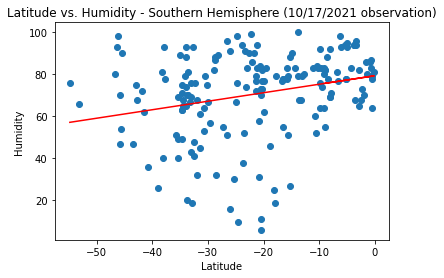

In [170]:
# Calculate the correlation coefficient and linear regression model 
# for humidity and latitude for the Southern hemisphere

#establish x and y values and find St. Pearson Correlation Coefficient for latitude and temperature
correlation = round(pearsonr(south_data['Lat'], south_data['Humidity'])[0], 2)

# establish linear regression values
model = linregress(south_data['Lat'], south_data['Humidity'])

print(f"R = {model[2]:.2f}   Slope = {model[0]:.2f}")
print(f"{association[int(abs(model[2]*3))]} ", end='')
print("Positive " if model[0] > 0 else "Negative ", end='')
print("Correlation")
print()

# linear regression line 
y_values = south_data['Lat'] * model[0] + model[1] # y = mx + b

#print(model)

# scatter plot of the data
plt.scatter(south_data['Lat'], south_data['Humidity'])
plt.title(f"Latitude vs. Humidity - Southern Hemisphere ({analysis_date} observation)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.plot(south_data['Lat'], y_values, color='red')

plt.show()


The preceding two charts plot humidity vs. latitude for the Northern and Southern hemispheres.  Both show a weak correlation between humidity and latitude.  The regression line for the Northern hemisphere actually predicts decreasing humidity moving away from the equator, which is counterintuitive and may indicate that any correlation is coincidental.  The Southern hemisphere show a slight higher Correlation Coefficient with humidity increase as latitudes approach the equator.  This may be due to the closer proximity of Southern hemisphere cities to coastlines and their associated impact on humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R = 0.16   Slope = 0.30
Weak Positive Correlation



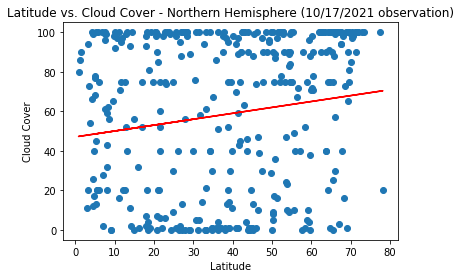

In [171]:
# Calculate the correlation coefficient and linear regression model 
# for cloud cover and latitude for the Northern hemisphere

#establish x and y values and find St. Pearson Correlation Coefficient for latitude and temperature
correlation = round(pearsonr(north_data['Lat'], north_data['Clouds'])[0], 2)

# establish linear regression values
model = linregress(north_data['Lat'], north_data['Clouds'])

print(f"R = {model[2]:.2f}   Slope = {model[0]:.2f}")
print(f"{association[int(abs(model[2]*3))]} ", end='')
print("Positive " if model[0] > 0 else "Negative ", end='')
print("Correlation")
print()

# linear regression line 
y_values = north_data['Lat'] * model[0] + model[1] # y = mx + b

#print(model)

# scatter plot of the data
plt.scatter(north_data['Lat'], north_data['Clouds'])
plt.title(f"Latitude vs. Cloud Cover - Northern Hemisphere ({analysis_date} observation)")
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover')
plt.plot(north_data['Lat'], y_values, color='red')

plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R = 0.13   Slope = 0.39
Weak Positive Correlation



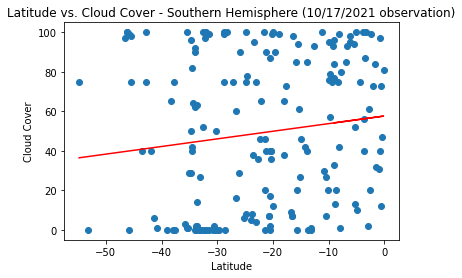

In [172]:
# Calculate the correlation coefficient and linear regression model 
# for cloud cover and latitude for the Southern hemisphere

#establish x and y values and find St. Pearson Correlation Coefficient for latitude and temperature
correlation = round(pearsonr(south_data['Lat'], south_data['Clouds'])[0], 2)

# establish linear regression values
model = linregress(south_data['Lat'], south_data['Clouds'])

print(f"R = {model[2]:.2f}   Slope = {model[0]:.2f}")
print(f"{association[int(abs(model[2]*3))]} ", end='')
print("Positive " if model[0] > 0 else "Negative ", end='')
print("Correlation")
print()

# linear regression line 
y_values = south_data['Lat'] * model[0] + model[1] # y = mx + b

#print(model)

# scatter plot of the data
plt.scatter(south_data['Lat'], south_data['Clouds'])
plt.title(f"Latitude vs. Cloud Cover - Southern Hemisphere ({analysis_date} observation)")
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover')
plt.plot(south_data['Lat'], y_values, color='red')

plt.show()


The preceding two plots show cloud cover vs. latitude.  Both the Northern and Southern hemispheres have very weak Correlation Coefficients.  As discussed earlier, due to the dynamic and variable nature of cloud activity, we would need to look at more than a single observation in order to do a meaninful analysis.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R = 0.22   Slope = 0.07
Weak Positive Correlation



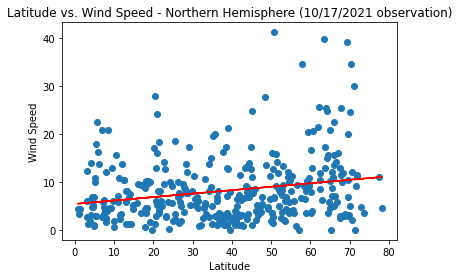

In [173]:
# Calculate the correlation coefficient and linear regression model 
# for wind speed and latitude for the Northern hemisphere

#establish x and y values and find St. Pearson Correlation Coefficient for latitude and temperature
correlation = round(pearsonr(north_data['Lat'], north_data['Winds'])[0], 2)

# establish linear regression values
model = linregress(north_data['Lat'], north_data['Winds'])

print(f"R = {model[2]:.2f}   Slope = {model[0]:.2f}")
print(f"{association[int(abs(model[2]*3))]} ", end='')
print("Positive " if model[0] > 0 else "Negative ", end='')
print("Correlation")
print()

# linear regression line 
y_values = north_data['Lat'] * model[0] + model[1] # y = mx + b

#print(model)

# scatter plot of the data
plt.scatter(north_data['Lat'], north_data['Winds'])
plt.title(f"Latitude vs. Wind Speed - Northern Hemisphere ({analysis_date} observation)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.plot(north_data['Lat'], y_values, color='red')

plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R = -0.12   Slope = -0.05
Weak Negative Correlation



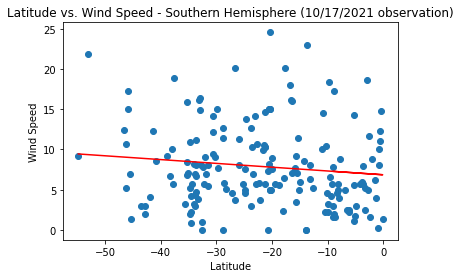

In [175]:
# Calculate the correlation coefficient and linear regression model 
# for wind speed and latitude for the Southern hemisphere

#establish x and y values and find St. Pearson Correlation Coefficient for latitude and temperature
correlation = round(pearsonr(south_data['Lat'], south_data['Winds'])[0], 2)

# establish linear regression values
model = linregress(south_data['Lat'], south_data['Winds'])

print(f"R = {model[2]:.2f}   Slope = {model[0]:.2f}")
print(f"{association[int(abs(model[2]*3))]} ", end='')
print("Positive " if model[0] > 0 else "Negative ", end='')
print("Correlation")
print()

# linear regression line 
y_values = south_data['Lat'] * model[0] + model[1] # y = mx + b

#print(model)

# scatter plot of the data
plt.scatter(south_data['Lat'], south_data['Winds'])
plt.title(f"Latitude vs. Wind Speed - Southern Hemisphere ({analysis_date} observation)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.plot(south_data['Lat'], y_values, color='red')

plt.show()


The two preceding plots show wind speed vs. latitude.  Both the Northern and Southern hemispheres have very weak Correlation Coefficients.  As discussed earlier, due to the dynamic and variable nature of wind speed, we would need to look at more than a single observation in order to do a meaninful analysis.